In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
NODES = {
    'Berkeley': 'GRIZZLY_7_N101',
    'Santa Barbara': 'GOLETA_6_N200',
    'Irvine': 'SANTIAGO_6_N026',
    'Davis': 'DAVIS_1_N030',
    'Riverside': 'RIVRSIDE_6_N001',
    'Santa Cruz': 'PAULSWT_1_N101',
    'Los Angeles': 'FAR_SUB_LNODEOND',
    'Merced': 'MERCEDFL_7_N002',
    'UCSD': 'UCM_6_N001'
}
def grab_data(start,end,nodes):
    df = pd.read_csv("input.csv")
    df = df[df['LMP_TYPE']=='LMP']
    df['timestamp']=df['INTERVALSTARTTIME_GMT'].map(lambda s: datetime.timestamp(datetime.strptime(s, '%Y-%m-%dT%H:%M:%S-00:00')))
    traces = {}
    for node in nodes:
        trace = df[df['NODE_ID']==NODES[node]]
        trace = trace.sort_values(by=['timestamp'])
        traces[node]=trace
    return traces

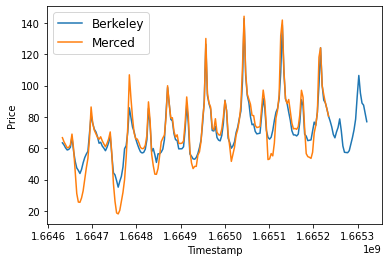

In [27]:
start = "2022-10-01T23:00:00-00:00"
end = "2022-10-07T23:00:00-00:00"
nodes = ["Berkeley","Merced"]
traces = grab_data(start,end,nodes)
for (name,trace) in traces.items():
    plt.plot(trace['timestamp'],trace['MW'],label=name)
plt.ylabel('Price')
plt.xlabel('Timestamp')
plt.legend(fontsize=12)
plt.savefig("%s_%s.png" % (nodes[0],nodes[1]),format="PNG")
plt.show()